In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
get_ipython().run_line_magic('matplotlib', 'inline')
plt.style.use("seaborn")

In [2]:
test = pd.read_csv("C:/Users/dudtj/OneDrive - 숭실대학교 - Soongsil University/Desktop/대학자료/SSUDA 스터디/panguin/test.csv")
train = pd.read_csv("C:/Users/dudtj/OneDrive - 숭실대학교 - Soongsil University/Desktop/대학자료/SSUDA 스터디/panguin/train.csv")

In [3]:
train.head()

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700


In [4]:
test.head()

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,52.0,20.7,210.0,MALE,9.43146,-24.68440
1,1,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,55.9,17.0,228.0,MALE,8.31180,-26.35425
2,2,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,38.9,18.8,190.0,FEMALE,8.36936,-26.11199
3,3,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,45.2,16.6,191.0,FEMALE,9.62357,-24.78984
4,4,Adelie Penguin (Pygoscelis adeliae),Biscoe,No,37.9,18.6,172.0,FEMALE,8.38404,-25.19837


In [5]:
#drop id column
train.drop(['id'],axis=1,inplace=True)
test.drop(['id'],axis=1,inplace=True)

In [6]:
train.shape,test.shape

((114, 10), (228, 9))

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              114 non-null    object 
 1   Island               114 non-null    object 
 2   Clutch Completion    114 non-null    object 
 3   Culmen Length (mm)   114 non-null    float64
 4   Culmen Depth (mm)    114 non-null    float64
 5   Flipper Length (mm)  114 non-null    int64  
 6   Sex                  111 non-null    object 
 7   Delta 15 N (o/oo)    111 non-null    float64
 8   Delta 13 C (o/oo)    111 non-null    float64
 9   Body Mass (g)        114 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 9.0+ KB


In [8]:
train.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
count,114.000000,114.000000,114.000000,111.000000,111.000000,114.000000
mean,44.613158,17.014912,203.052632,8.737634,-25.723051,4327.850877
std,5.321829,1.941363,14.653425,0.567698,0.859786,781.766484
min,33.500000,13.200000,174.000000,7.632200,-27.018540,2700.000000
25%,40.325000,15.225000,190.000000,8.272585,-26.434025,3675.000000
50%,45.200000,17.250000,199.000000,8.632590,-25.955410,4250.000000
75%,49.075000,18.600000,216.000000,9.264635,-25.005945,4850.000000
max,55.100000,21.100000,231.000000,10.025440,-24.102550,6300.000000


id : 샘플 아이디

Species: 펭귄의 종을 나타내는 문자열

Island : 샘플들이 수집된 Palmer Station 근처 섬 이름

Clutch Completion : 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기

Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이

Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이

Flipper Length (mm) : 펭귄의 팔(날개) 길이

Sex : 펭귄의 성별

Delta 15 N (o/oo) : 토양에 따라 변화하는 안정 동위원소 15N:14N의 비율

Delta 13 C (o/oo) : 먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율

Body Mass (g): 펭귄의 몸무게를 나타내는 숫자 (g)

In [9]:
target = train['Body Mass (g)']
object_columns = ['Species','Island','Clutch Completion','Sex']
numerical_columns= ['Culmen Depth (mm)','Culmen Length (mm)','Flipper Length (mm)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']

Species
Gentoo penguin (Pygoscelis papua)            48
Adelie Penguin (Pygoscelis adeliae)          41
Chinstrap penguin (Pygoscelis antarctica)    25
Name: Species, dtype: int64


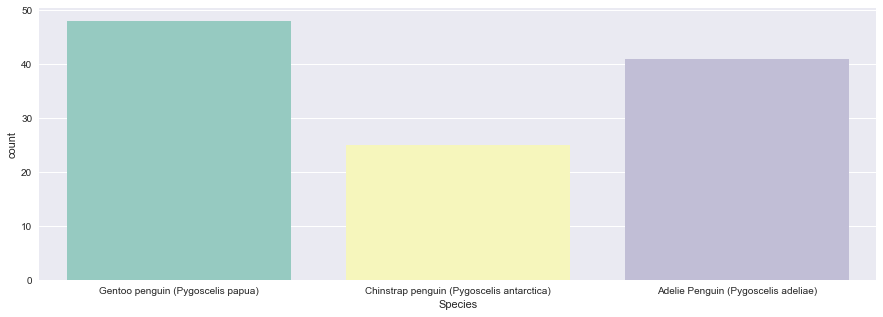

Island
Biscoe       57
Dream        44
Torgersen    13
Name: Island, dtype: int64


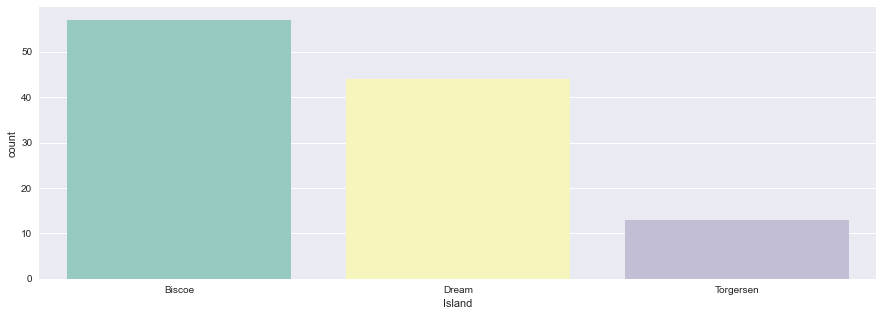

Clutch Completion
Yes    102
No      12
Name: Clutch Completion, dtype: int64


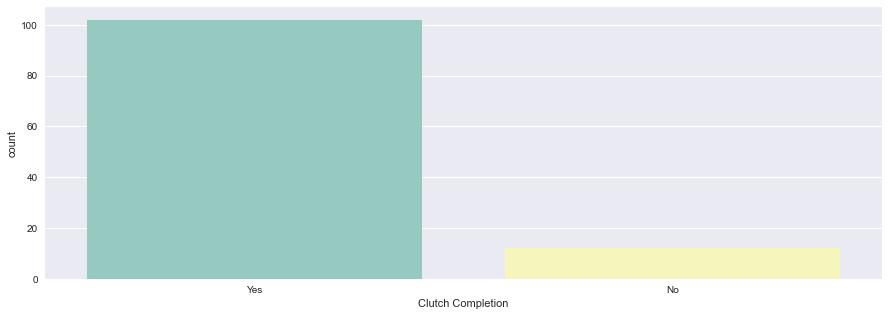

Sex
MALE      56
FEMALE    55
Name: Sex, dtype: int64


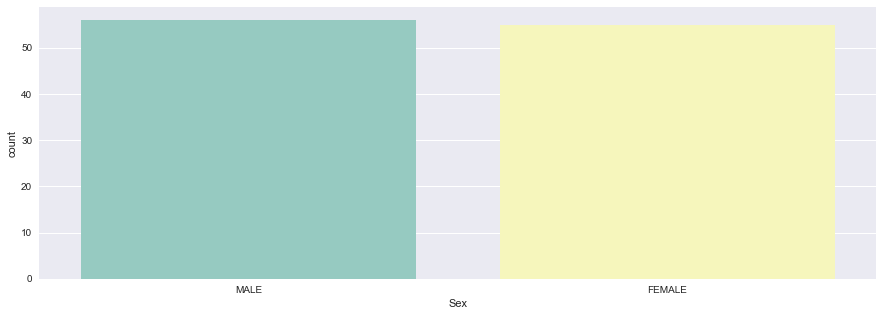

In [10]:
for _ in object_columns:
    print(_)
    print(train[_].value_counts())
    plt.figure(figsize=(15,5))
    sns.countplot(x=train[_],palette='Set3')
    plt.show()

Culmen Depth (mm)


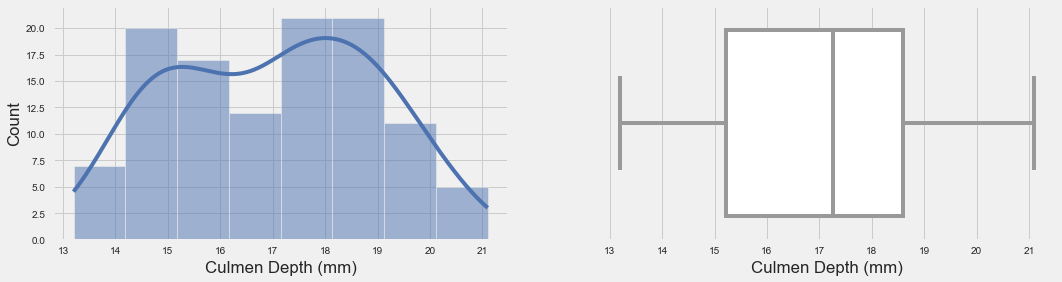

<Figure size 1080x360 with 0 Axes>

Culmen Length (mm)


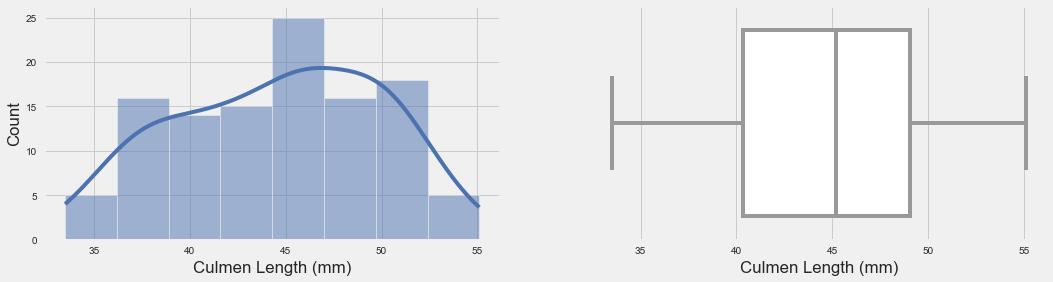

<Figure size 1080x360 with 0 Axes>

Flipper Length (mm)


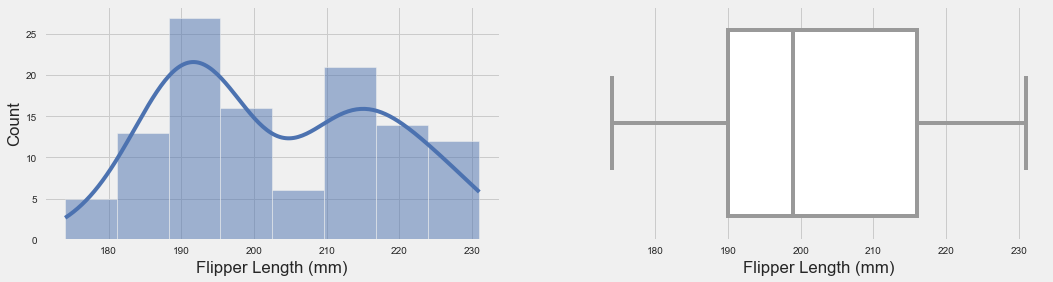

<Figure size 1080x360 with 0 Axes>

Delta 15 N (o/oo)


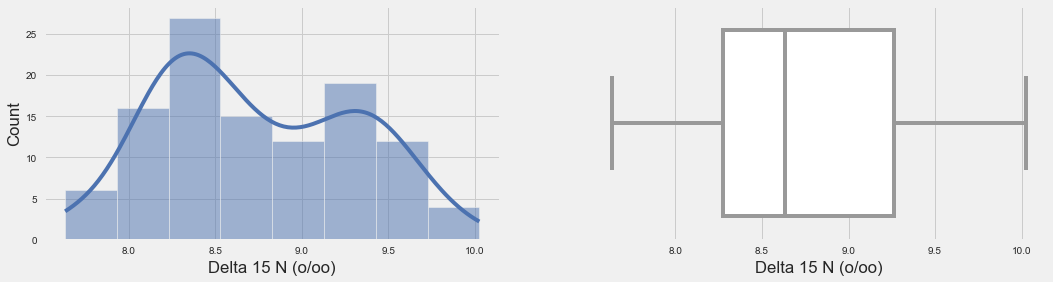

<Figure size 1080x360 with 0 Axes>

Delta 13 C (o/oo)


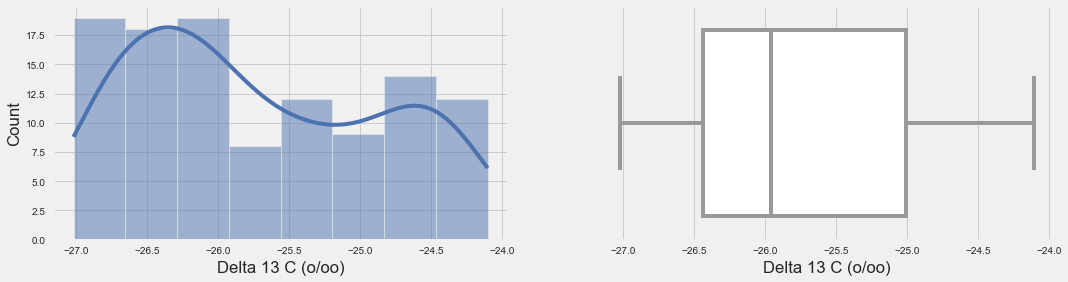

<Figure size 1080x360 with 0 Axes>

In [11]:
plt.style.use('fivethirtyeight')
for _ in numerical_columns:
    print(_)
    f,ax=plt.subplots(1,2,figsize=(16,4))
    plt.figure(figsize=(15,5))
    sns.histplot(x=train[_],ax=ax[0],kde=True)
    sns.boxplot(x=train[_],ax=ax[1],color='white')
    plt.show()

정규분포에 위배되긴 하지만 나름 정규성을 따라간다. 
표준화해주면 좋을듯?

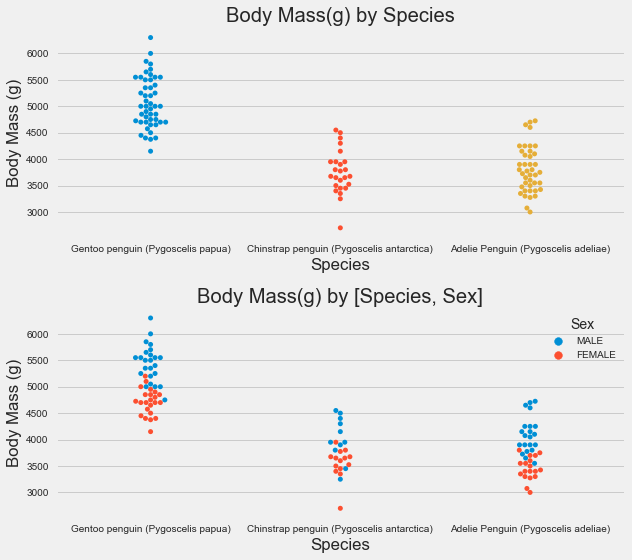

In [12]:
#Show 'Body Mass (g)' by Species. + 'Sex'
f,ax= plt.subplots(2,1,figsize=(9,8))
sns.swarmplot(data=train, x='Species',y='Body Mass (g)',ax=ax[0]);
ax[0].set_title("Body Mass(g) by Species")
sns.swarmplot(data=train, x='Species',y='Body Mass (g)',hue='Sex',ax=ax[1]);
ax[1].set_title("Body Mass(g) by [Species, Sex]")

plt.tight_layout() #Show clearly.

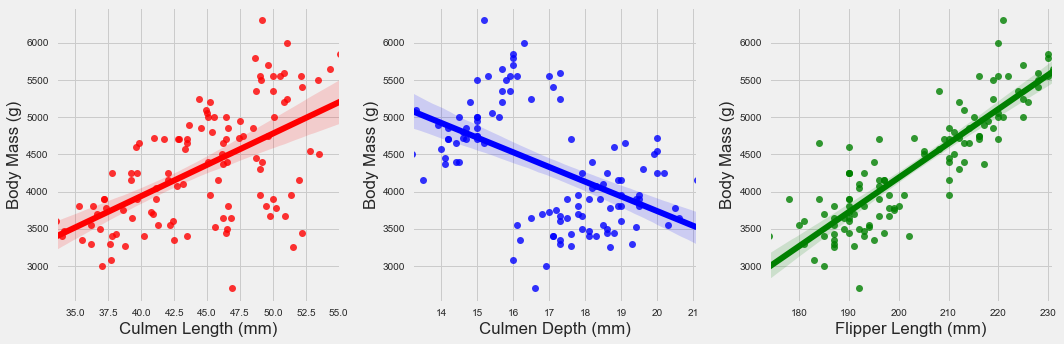

In [13]:
f,ax=plt.subplots(1,3,figsize=(15,5))
sns.regplot(data=train, x='Culmen Length (mm)',y='Body Mass (g)',ax=ax[0],color='red')
sns.regplot(data=train, x='Culmen Depth (mm)',y='Body Mass (g)',ax=ax[1],color='blue')
sns.regplot(data=train, x='Flipper Length (mm)',y='Body Mass (g)',ax=ax[2],color='green')

plt.tight_layout()

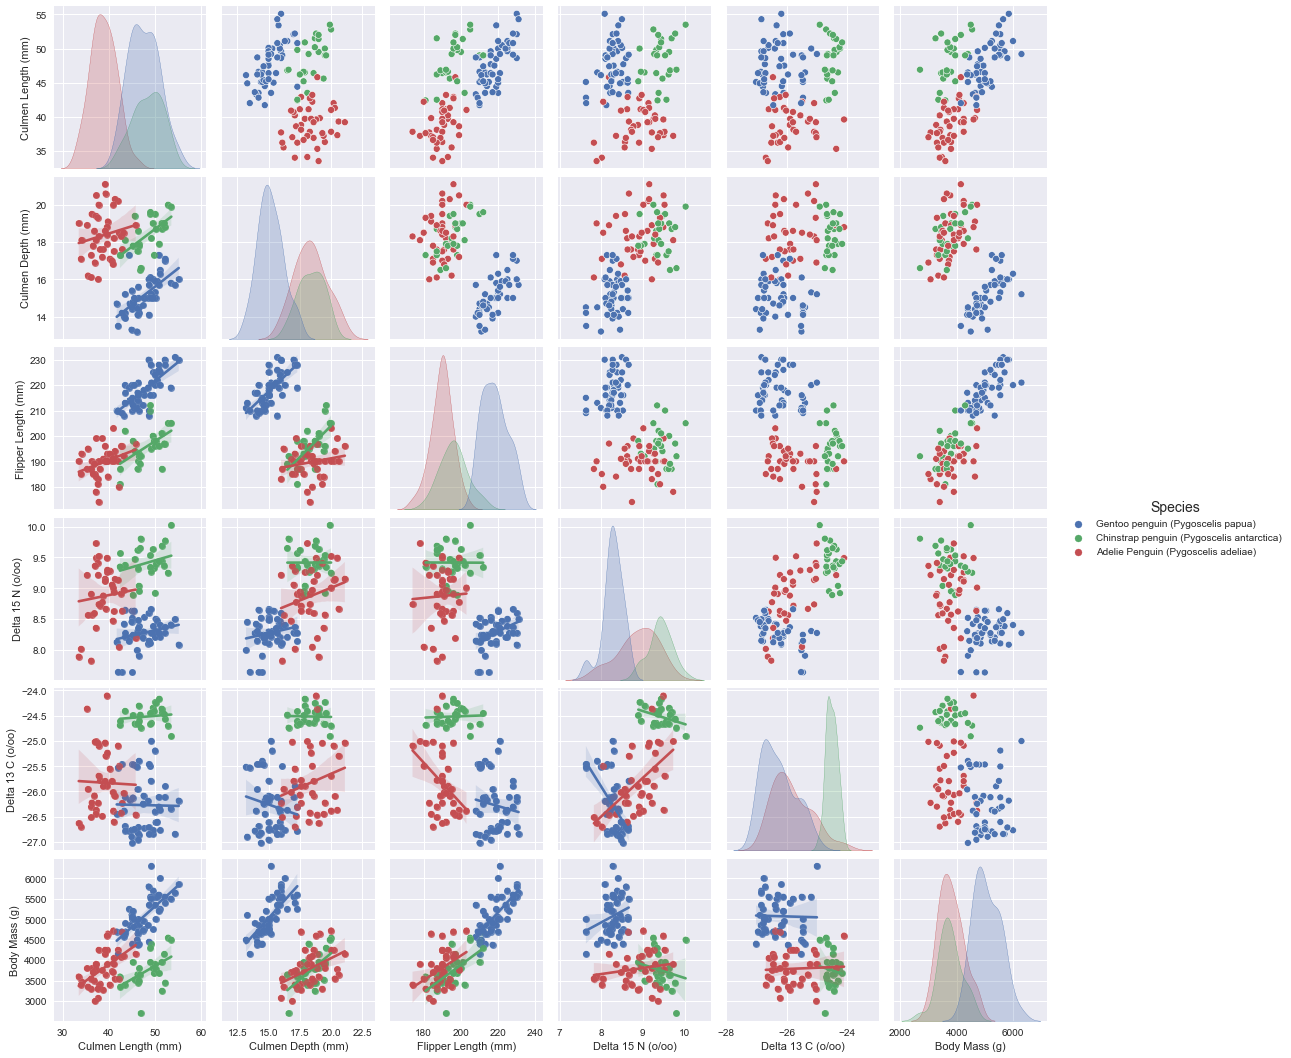

In [14]:
plt.style.use('seaborn')
g= sns.pairplot(train,hue='Species')
g.map_lower(sns.regplot);

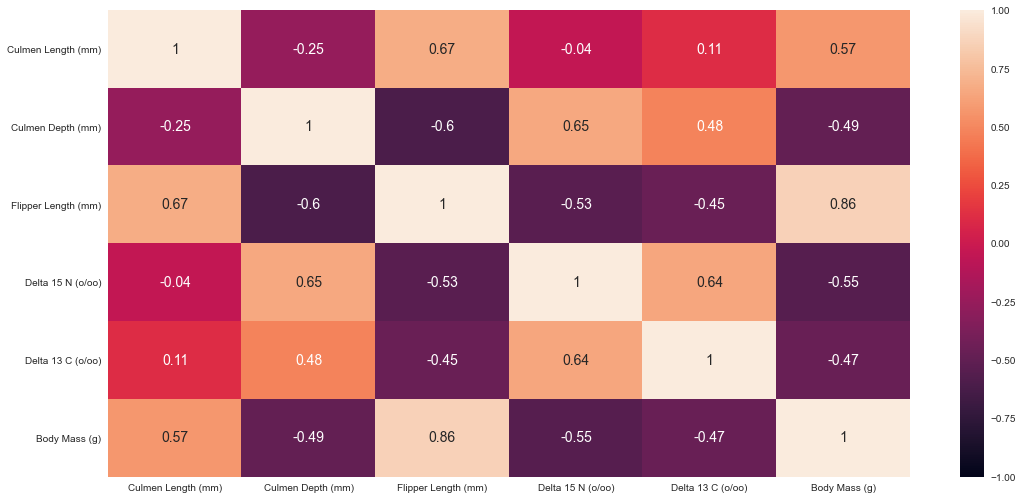

In [15]:
plt.figure(figsize=(16,8))
sns.heatmap(train.corr(),annot=True,vmin=-1, vmax=1);

In [16]:
train.isnull().sum()

Species                0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Sex                    3
Delta 15 N (o/oo)      3
Delta 13 C (o/oo)      3
Body Mass (g)          0
dtype: int64

In [17]:
train.corr()['Body Mass (g)']

Culmen Length (mm)     0.572063
Culmen Depth (mm)     -0.490643
Flipper Length (mm)    0.864814
Delta 15 N (o/oo)     -0.548678
Delta 13 C (o/oo)     -0.468425
Body Mass (g)          1.000000
Name: Body Mass (g), dtype: float64

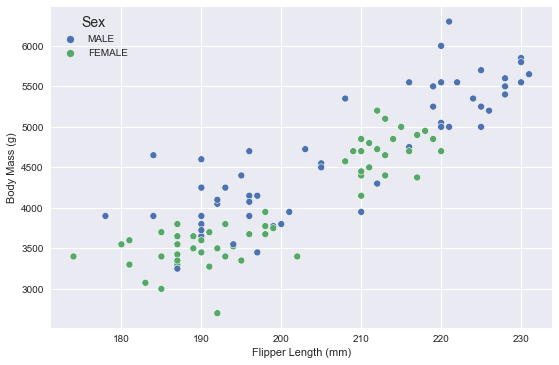

In [18]:
sns.scatterplot(data=train, x='Flipper Length (mm)', y= 'Body Mass (g)', hue='Sex');

In [19]:
train.groupby(['Species','Sex'])['Flipper Length (mm)'].mean().reset_index()

,Species,Sex,Flipper Length (mm)
0,Adelie Penguin (Pygoscelis adeliae),FEMALE,187.166667
1,Adelie Penguin (Pygoscelis adeliae),MALE,191.619048
2,Chinstrap penguin (Pygoscelis antarctica),FEMALE,192.642857
3,Chinstrap penguin (Pygoscelis antarctica),MALE,200.454545
4,Gentoo penguin (Pygoscelis papua),FEMALE,213.217391
5,Gentoo penguin (Pygoscelis papua),MALE,223.000000


In [20]:
train[train['Sex'].isnull()]

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
6,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,42.0,20.2,190,NaN,9.13362,-25.09368,4250
8,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,34.1,18.1,193,NaN,NaN,NaN,3475
70,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.2,14.4,214,NaN,8.24253,-26.81540,4650


In [21]:
test.groupby(['Species','Sex'])['Flipper Length (mm)'].mean().reset_index()

,Species,Sex,Flipper Length (mm)
0,Adelie Penguin (Pygoscelis adeliae),FEMALE,188.000000
1,Adelie Penguin (Pygoscelis adeliae),MALE,192.730769
2,Chinstrap penguin (Pygoscelis antarctica),FEMALE,191.100000
3,Chinstrap penguin (Pygoscelis antarctica),MALE,199.652174
4,Gentoo penguin (Pygoscelis papua),FEMALE,212.371429
5,Gentoo penguin (Pygoscelis papua),MALE,220.594595


In [22]:
test[test['Sex'].isnull()]

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
46,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,37.8,17.1,186.0,NaN,8.63243,-25.21315
81,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,37.5,18.9,179.0,NaN,NaN,NaN
98,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,47.3,13.8,216.0,NaN,8.25818,-26.23886
152,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,15.7,217.0,NaN,8.04111,-26.18444
205,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,37.8,17.3,180.0,NaN,NaN,NaN
209,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.3,216.0,NaN,7.96621,-25.69327


In [23]:
train.fillna(train.mean(), inplace = True)
test.fillna(train.mean(), inplace = True)

train.loc[6,'Sex']='MALE'
train.loc[8,'Sex']='MALE'
train.loc[70,'Sex']='FEMALE'

#test Dataset
test.loc[46,'Sex']='FEMALE'
test.loc[81,'Sex']='FEMALE'
test.loc[98,'Sex']='MALE' 
test.loc[152,'Sex']='MALE'
test.loc[205,'Sex']='FEMALE'
test.loc[209,'Sex']='FEMALE'

In [24]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [25]:
discrete_names = ['Species', 'Island', 'Clutch Completion', 'Sex']
continuous_names = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_scaler = scaler.fit_transform(train[continuous_names])
train[continuous_names] = pd.DataFrame(data=train_scaler, columns=continuous_names)

test_scaler = scaler.transform(test[continuous_names])
test[continuous_names] = pd.DataFrame(data=test_scaler, columns=continuous_names)

train[continuous_names].head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo)
0,1.016685,-0.887255,1.161653,-0.775548,0.630951
1,0.922318,1.027037,-0.209242,1.601553,1.629486
2,0.091884,-1.352893,0.476205,-0.391149,-1.533908
3,-0.021357,-1.197680,0.750384,-0.962206,-0.523568
4,0.941191,-0.525091,1.504376,-0.635514,-1.325731


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,BayesianRidge

In [28]:
X= train.drop(['Body Mass (g)'],axis=1)
y= train['Body Mass (g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [29]:
#https://dacon.io/competitions/official/235862/codeshare/4052?page=1&dtype=recent (SSU통계학과)
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

alphas = [0,0.01,0.1,1,9,10,100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    neg_mse_scores = cross_val_score(ridge, X, y, scoring = 'neg_mean_squared_error', cv = 5)
    avg_rmse = np.mean(np.sqrt(-neg_mse_scores))
    print('alpha 값 ', alpha, '일때 평균 rmse :', np.round(avg_rmse,4))

alpha 값  0 일때 평균 rmse : 332.6307
alpha 값  0.01 일때 평균 rmse : 335.4318
alpha 값  0.1 일때 평균 rmse : 334.5428
alpha 값  1 일때 평균 rmse : 330.299
alpha 값  9 일때 평균 rmse : 328.1116
alpha 값  10 일때 평균 rmse : 328.4763
alpha 값  100 일때 평균 rmse : 404.5087


C:\Users\dudtj\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.81173e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [30]:
#Ridge
ridge = Ridge(alpha=0.01)
ridge.fit(X_train,y_train)
pred= ridge.predict(X_test)
print(ridge.score(X_test,y_test))

0.8290727649695926


In [31]:
import numpy as np

def RMSE(true, pred):
    score = np.sqrt(np.mean(np.square(true-pred)))
    return score

RMSE(y_test,pred)

311.60898494935975

In [32]:
X=train.drop(['Body Mass (g)'],axis=1)
y= train['Body Mass (g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [33]:
final_pred= ridge.predict(test)
sample_submission= pd.read_csv("C:/Users/oem/Downloads/dataset/sample_submission.csv")
sample_submission['Body Mass (g)'] = final_pred
sample_submission.set_index(['id']).to_csv("C:/Users/oem/Downloads/dataset/submission.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/oem/Downloads/dataset/sample_submission.csv'